In [1]:
import arviz as az
import pystan, pickle
import os
# os.environ['STAN_NUM_THREADS'] = "4"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import networkx as nx
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# %matplotlib inline

# Load Data

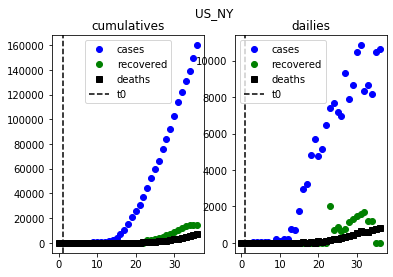

In [31]:
roi = "US_NY"

DF = pd.read_csv("../data/covid_timeseries_"+roi+".csv")

# pop = {}
# pop['Italy'] = 60500000
# pop['United Kingdom'] = 64400000
# pop['France'] = 66990000
# pop['Netherlands'] = 17000000

# mitigate = {}
# mitigate['Italy'] = '3/9/20' #approximate date
# mitigate['Netherlands'] = '3/12/20' #approximate date

# t0 := where to start time series, index space
t0 = np.where(DF["new_cases"].values>=10)[0][0] 
# tm := start of mitigation, index space
tm = t0 + 10 #np.where(mitigate[roi]==DF['dates2'])[0][0]

#plot the data with important time stamps (t0, tm)
plt.subplot(1,2,1)
plt.title('cumulatives')
plt.plot(DF["cum_cases"],'bo', label="cases")
plt.plot(DF["cum_recover"],'go',label="recovered")
plt.plot(DF["cum_deaths"],'ks',label="deaths")

plt.axvline(t0,color='k', linestyle="dashed", label='t0')
# plt.axvline(tm,color='b', linestyle="dashed", label='mitigate')
plt.legend()


plt.subplot(1,2,2)
plt.title('dailies')
plt.plot(DF["new_cases"],'bo', label="cases")
plt.plot(DF["new_recover"],'go',label="recovered")
plt.plot(DF["new_deaths"],'ks',label="deaths")
plt.axvline(t0,color='k', linestyle="dashed", label='t0')
# plt.axvline(tm,color='b', linestyle="dashed", label='mitigate')
plt.suptitle(roi)
plt.legend()


# print("t0 index assumed to be: day "+str(t0))
# print("t0 date: "+DF['dates2'][t0])
# print("tm index assumed to be: day "+str(tm))
# print("mitigation date: "+DF['dates2'][tm])



In [48]:
NY = pickle.load(open("./fits/model_fitUS_NY.pkl", 'rb'))

{'model': <pystan.model.StanModel object at 0x12f23bf90>, 'fit': 
For the full summary use 'print(fit)'

Inference for Stan model: anon_model_39dfb0158a05fc823b35e926eb435920.
4 chains, each with iter=5000; warmup=1000; thin=50; 
post-warmup draws per chain=80, total post-warmup draws=320.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[1]    4.57    2.96   4.23   1.17    1.2   2.72   7.38  12.85      2   15.1
theta[2]    3.65    2.69   3.85   0.07   0.95   1.79   6.17  11.19      2  14.05
theta[3]    0.01  2.9e-4 4.2e-4   0.01   0.01   0.01   0.01   0.01      2   6.93
theta[4]  5.5e-3  1.1e-4 1.7e-4 5.2e-3 5.4e-3 5.6e-3 5.7e-3 5.8e-3      2   4.67
theta[5]  6.2e-3  6.0e-3 9.0e-3 2.3e-6 3.6e-5 6.8e-4 4.3e-3   0.02      2   3.93
theta[6]    0.27    0.08   0.11   0.08   0.15   0.33   0.36   0.37      2   9.59
theta[7]    0.02  5.0e-4 7.6e-4   0.02   0.02   0.02   0.02   0.02      2   5.47
theta[8]  486.22    7.88  11.19 471.98 478.05 484.13 493.84 

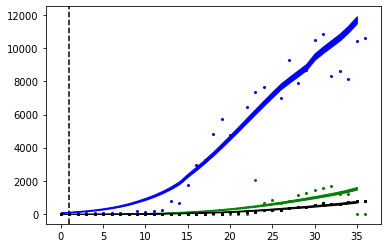

In [54]:
print(NY)


plt.plot(DF["new_cases"],'bo',ms=2, label="cases")
plt.plot(DF["new_recover"],'go',ms=2,label="recovered")
plt.plot(DF["new_deaths"],'ks',ms=2,label="deaths")
plt.axvline(t0,color='k', linestyle="dashed", label='t0')



Chat = np.median(NY['fit']['lambda'][:,:,0],0)
Rhat = np.median(NY['fit']['lambda'][:,:,1],0)
Dhat = np.median(NY['fit']['lambda'][:,:,2],0)

x = np.arange(len(Chat))
plt.fill_between(x, Chat-2*(Chat**0.5), Chat+2*(Chat**0.5),color='b')
plt.fill_between(x, Rhat-2*(Rhat**0.5), Rhat+2*(Rhat**0.5),color='g')
plt.fill_between(x, Dhat-2*(Dhat**0.5), Dhat+2*(Dhat**0.5),color='k')



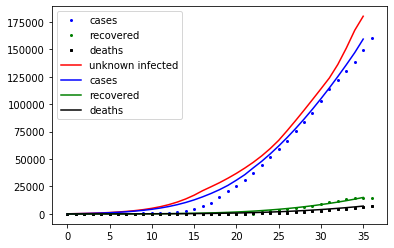

In [67]:
N_I = np.median(NY['fit']['u'][:,:,2],0)
N_C = np.median(NY['fit']['u'][:,:,3],0)
N_R = np.median(NY['fit']['u'][:,:,4],0)
N_D = np.median(NY['fit']['u'][:,:,5],0)

plt.plot(DF["cum_cases"],'bo',ms=2, label="cases")
plt.plot(DF["cum_recover"],'go',ms=2,label="recovered")
plt.plot(DF["cum_deaths"],'ks',ms=2,label="deaths")

plt.plot(10e4*N_I,'r',label='unknown infected') #factor of ten too big? n_scale is 10^5
plt.plot(10e4*N_C,'b',label='cases')
plt.plot(10e4*N_R,'g',label='recovered')
plt.plot(10e4*N_D,'k',label='deaths')
plt.legend()